In [ ]:
#| hide
import sys
sys.path.append("/notebooks/katlas")
from nbdev.showdoc import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
from katlas.core import Data
from katlas.feature import *
from katlas.plot import *
from fastbook import *
from tqdm.notebook import tqdm; tqdm.pandas()

/usr/local/lib/python3.9/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

# Get amino acid features

> Extract features from amino acid

We can use two methods to extract features from amino acid:
- Rdkit descriptors
- Morgan Fingerprints

## Rdkit descriptors

In [ ]:
# Download the amino acid info
aa = Data.get_aa_info().set_index('aa')
# aa_info2 = aa_info[['aa','SMILES']]

Extract all of the 209 rdkit features

In [ ]:
get_rdkit?

Signature: get_rdkit(df, col='SMILES', normalize=True)
Docstring: Extract ~209 features from smiles via rdkit.Chem.Descriptors, and remove duplicate features
File:      /notebooks/katlas/katlas/feature.py
Type:      function


In [ ]:
aa_rdkit = get_rdkit(aa, 'SMILES')

In [ ]:
aa_rdkit.head(2)

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
aa,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,-1.573701,-1.573701,1.193554,0.430590,-0.375462,-1.439770,-1.410267,-1.439436,-1.491575,0.0,-0.392233,0.228166,-0.308911,-0.398345,1.656688,0.103007,-0.780051,-0.526903,1.203883,-1.415519,1.465101,-1.347549,1.162418,-0.554270,0.678178,-1.660842,0.058766,-0.928528,-1.420966,-1.372879,-1.406169,-1.434358,-1.395786,-1.364454,-1.28965,-1.287461,-1.371840,-1.490293,-1.312462,-1.397762,0.661861,-0.443256,-1.488584,-1.704924,-1.164169,-1.472171,-1.088274,-0.113045,-0.213201,-0.308607,0.0,-0.521596,-0.682582,-0.458413,-0.308393,0.0,-0.647398,-0.224260,-0.480351,-0.694405,-0.68823,-0.882977,-0.213201,-0.432331,-0.495561,-0.290532,-0.695145,-0.511968,0.0,-0.308607,-0.482124,0.0,-0.308607,-0.510698,-1.373429,-0.884527,-0.45843,-0.241607,-0.504435,0.0,-0.213201,0.0,-0.945646,-0.535127,-0.66116,0.0,-0.922850,-0.621218,-0.611041,0.790873,-0.440926,-0.455591,-0.769976,-0.626017,-0.387091,-0.285797,-0.779939,-0.748232,-0.483822,0.342808,-0.393932,-0.4624,0.572190,0.387283,0.349099,-1.412520,-0.883541,-0.955395,0.0,-0.213201,-0.213201,-0.458831,-0.308607,-0.493197,-1.192079,-1.091089,-0.960437,-1.707117,0.0,-0.213201,-0.213201,-0.55689,-0.082356,-1.373751,-0.308607,-0.308607,-0.308607,0.0,0.0,-0.291386,-0.308607,-0.213201,-0.308607,-0.308607,-0.458831,-0.308607,0.0,0.0,0.0,-0.213201,-0.428746,-0.291386,0.

### Plot

Let's now visualize this feature!

There are several dimension reduction methods that we can use to visualize in a 2D graph: PCA, TSNE, and UMAP


PCA

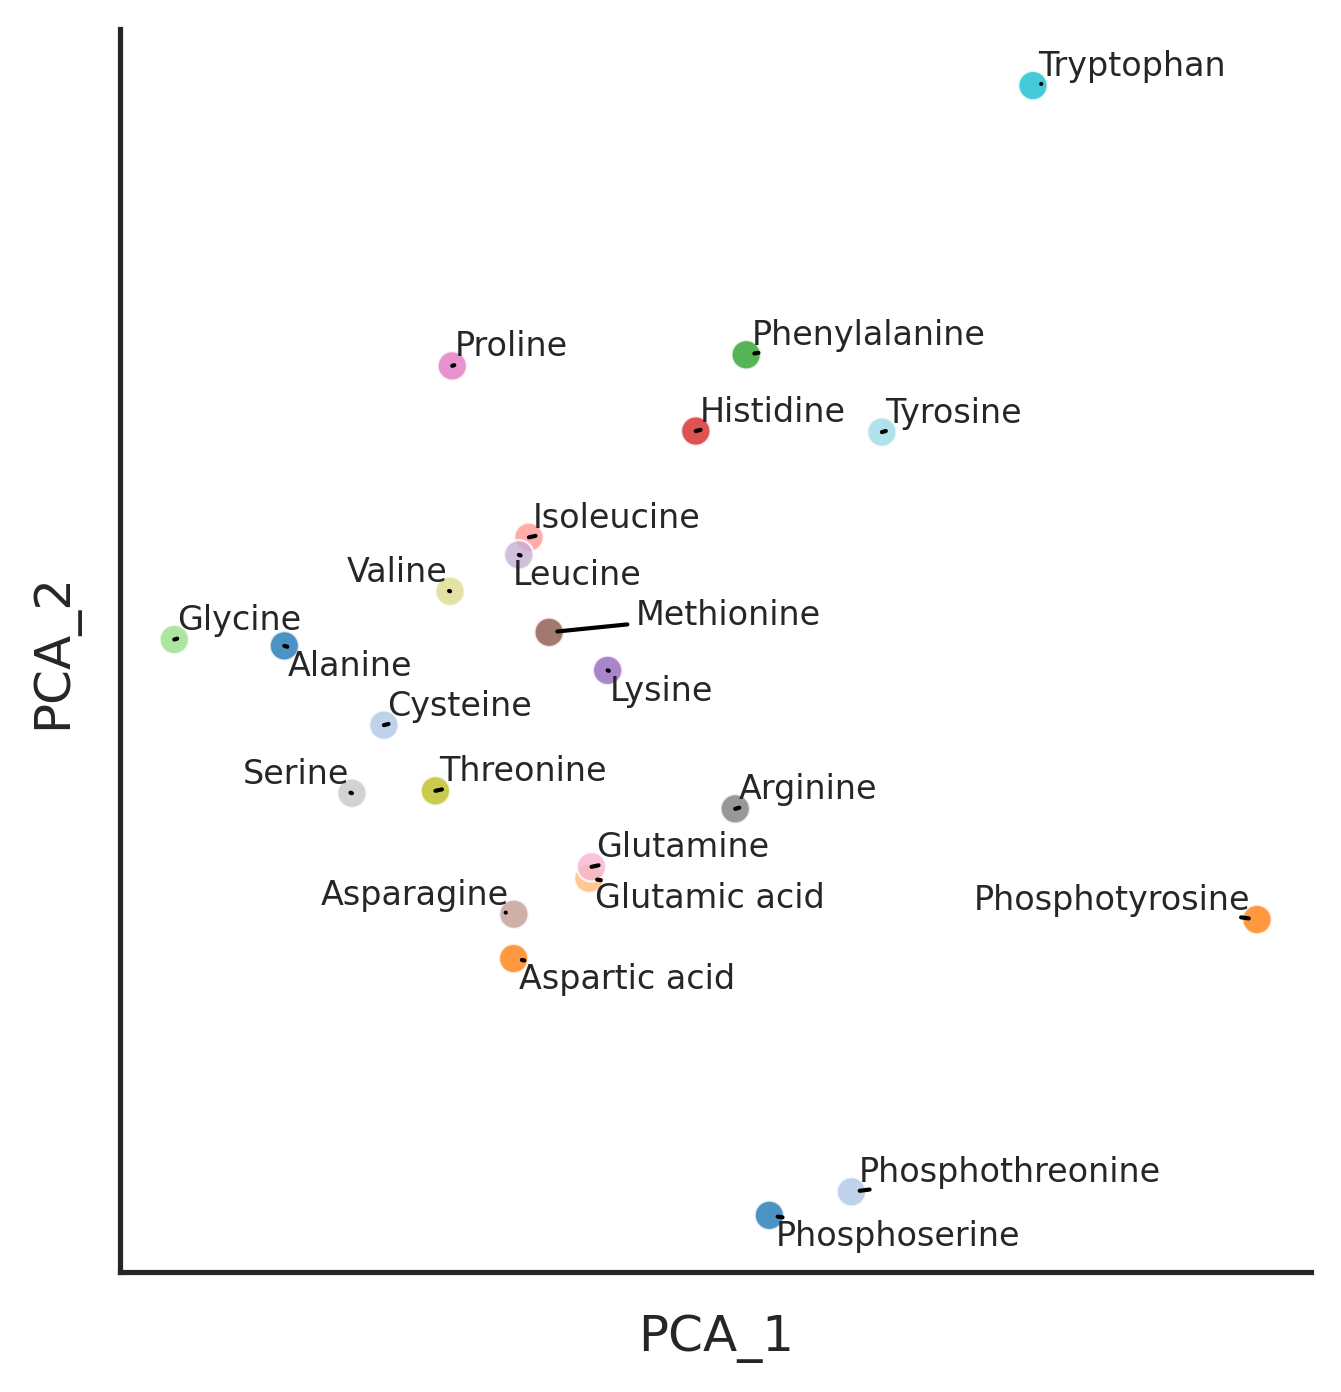

In [ ]:
plot_cluster(aa_rdkit, name_list = aa.Name, hue = 'aa', method = 'pca')

UMAP

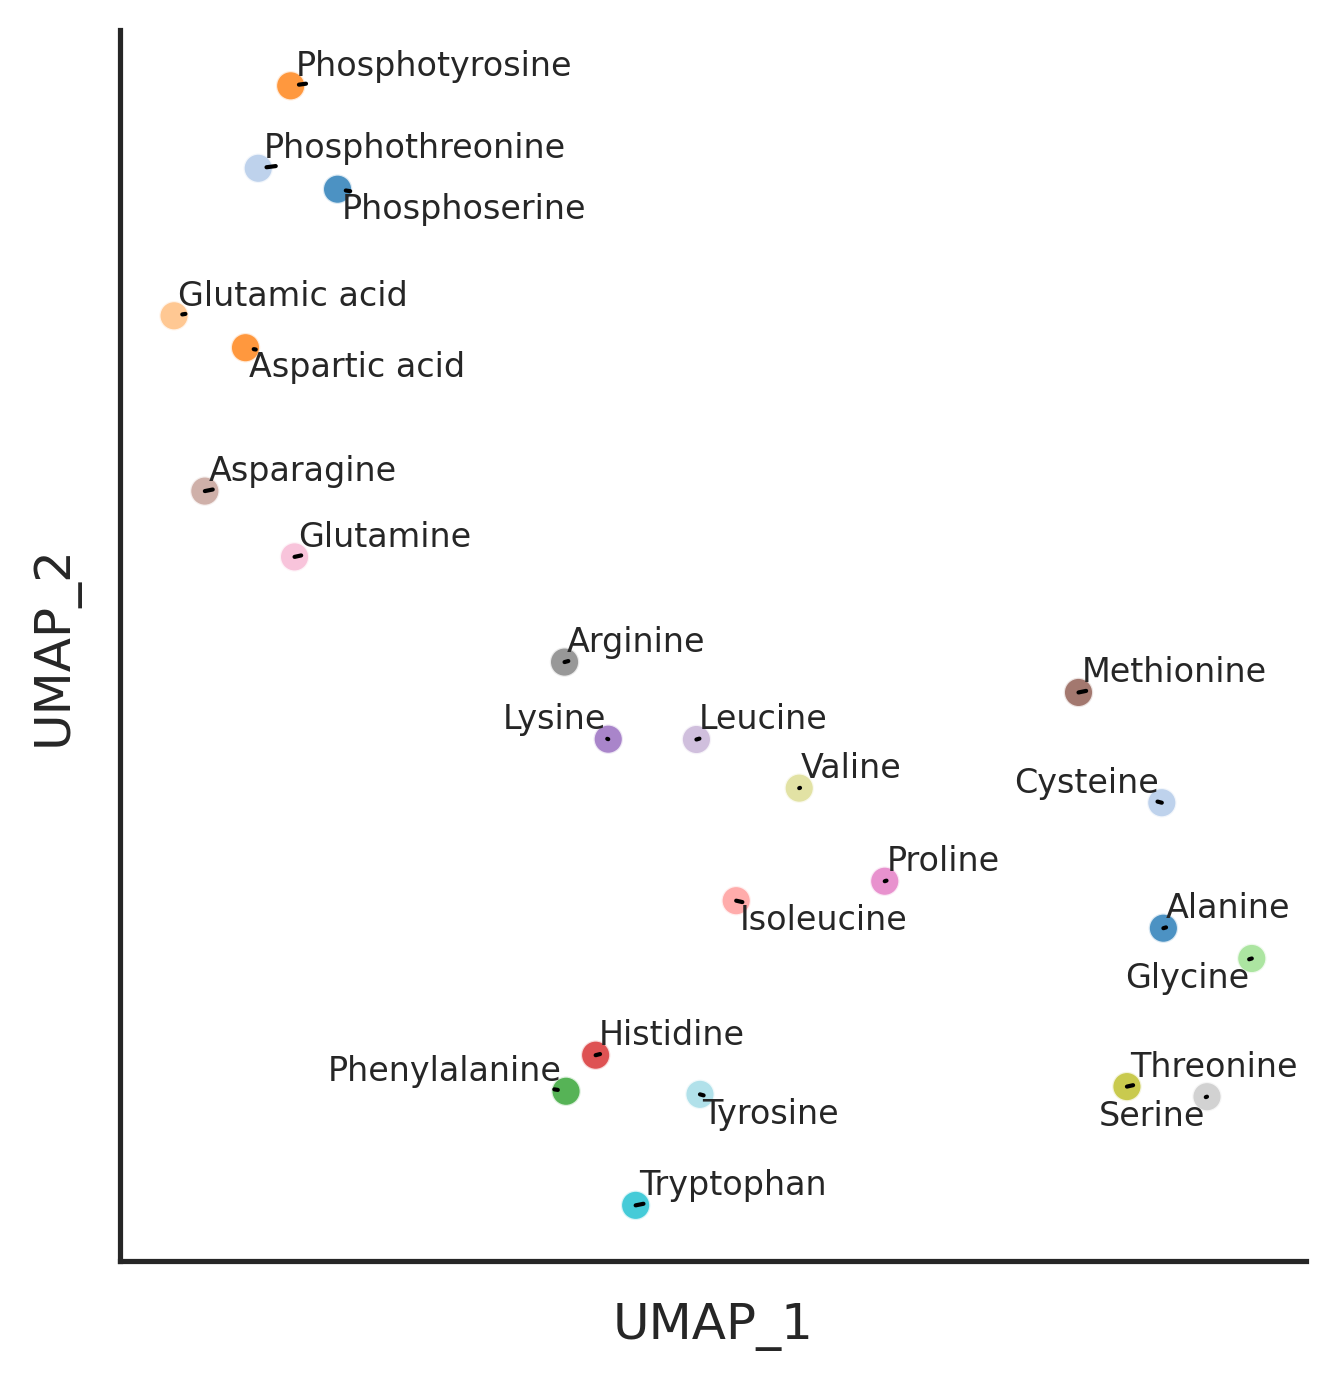

In [ ]:
# visualize aa full feature
plot_cluster(aa_rdkit, name_list = aa.Name, hue = 'aa', method = 'umap',complexity=4)

## Morgan Fingerprints

In [ ]:
aa_morgan = get_morgan(aa)

In [ ]:
aa_morgan.head()

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,morgan_10,morgan_11,morgan_12,morgan_13,morgan_14,morgan_15,morgan_16,morgan_17,morgan_18,morgan_19,morgan_20,morgan_21,morgan_22,morgan_23,morgan_24,morgan_25,morgan_26,morgan_27,morgan_28,morgan_29,morgan_30,morgan_31,morgan_32,morgan_33,morgan_34,morgan_35,morgan_36,morgan_37,morgan_38,morgan_39,morgan_40,morgan_41,morgan_42,morgan_43,morgan_44,morgan_45,morgan_46,morgan_47,morgan_48,morgan_49,morgan_50,morgan_51,morgan_52,morgan_53,morgan_54,morgan_55,morgan_56,morgan_57,morgan_58,morgan_59,morgan_60,morgan_61,morgan_62,morgan_63,morgan_64,morgan_65,morgan_66,morgan_67,morgan_68,morgan_69,morgan_70,morgan_71,morgan_72,morgan_73,morgan_74,morgan_75,morgan_76,morgan_77,morgan_78,morgan_79,morgan_80,morgan_81,morgan_82,morgan_83,morgan_84,morgan_85,morgan_86,morgan_87,morgan_88,morgan_89,morgan_90,morgan_91,morgan_92,morgan_93,morgan_94,morgan_95,morgan_96,morgan_97,morgan_98,morgan_99,morgan_100,morgan_101,morgan_102,morgan_103,morgan_104,morgan_105,morgan_106,morgan_107,morgan_108,morgan_109,morgan_110,morgan_111,morgan_112,morgan_113,morgan_114,morgan_115,morgan_116,morgan_117,morgan_118,morgan_119,morgan_120,morgan_121,morgan_122,morgan_123,morgan_124,morgan_125,morgan_126,morgan_127,morgan_128,morgan_129,morgan_130,morgan_131,morgan_132,morgan_133,morgan_134,morgan_135,morgan_136,morgan_137,morgan_138,morgan_139,morgan_140,morgan_141,morgan_142,morgan_143,morgan_144,morgan_145,morgan_146,morgan_147,morgan_148,morgan_149,morgan_150,morgan_151,morgan_152,morgan_153,morgan_154,morgan_155,morgan_156,morgan_157,morgan_158,morgan_159,morgan_160,morgan_161,morgan_162,morgan_163,morgan_164,morgan_165,morgan_166,morgan_167,morgan_168,morgan_169,morgan_170,morgan_171,morgan_172,morgan_173,morgan_174,morgan_175,morgan_176,morgan_177,morgan_178,morgan_179,morgan_180,morgan_181,morgan_182,morgan_183,morgan_184,morgan_185,morgan_186,morgan_187,morgan_188,morgan_189,morgan_190,morgan_191,morgan_192,morgan_193,morgan_194,morgan_195,morgan_196,morgan_197,morgan_198,morgan_199,morgan_200,morgan_201,morgan_202,morgan_203,morgan_204,morgan_205,morgan_206,morgan_207,morgan_208,morgan_209,morgan_210,morgan_211,morgan_212,morgan_213,morgan_214,morgan_215,morgan_216,morgan_217,morgan_218,morgan_219,morgan_220,morgan_221,morgan_222,morgan_223,morgan_224,morgan_225,morgan_226,morgan_227,morgan_228,morgan_229,morgan_230,morgan_231,morgan_232,morgan_233,morgan_234,morgan_235,morgan_236,morgan_237,morgan_238,morgan_239,morgan_240,morgan_241,morgan_242,morgan_243,morgan_244,morgan_245,morgan_246,morgan_247,morgan_248,morgan_249,morgan_250,morgan_251,morgan_252,morgan_253,morgan_254,morgan_255,morgan_256,morgan_257,morgan_258,morgan_259,morgan_260,morgan_261,morgan_262,morgan_263,morgan_264,morgan_265,morgan_266,morgan_267,morgan_268,morgan_269,morgan_270,morgan_271,morgan_272,morgan_273,morgan_274,morgan_275,morgan_276,morgan_277,morgan_278,morgan_279,morgan_280,morgan_281,morgan_282,morgan_283,morgan_284,morgan_285,morgan_286,morgan_287,morgan_288,morgan_289,morgan_290,morgan_291,morgan_292,morgan_293,morgan_294,morgan_295,morgan_296,morgan_297,morgan_298,morgan_299,morgan_300,morgan_301,morgan_302,morgan_303,morgan_304,morgan_305,morgan_306,morgan_307,morgan_308,morgan_309,morgan_310,morgan_311,morgan_312,morgan_313,morgan_314,morgan_315,morgan_316,morgan_317,morgan_318,morgan_319,morgan_320,morgan_321,morgan_322,morgan_323,morgan_324,morgan_325,morgan_326,morgan_327,morgan_328,morgan_329,morgan_330,morgan_331,morgan_332,morgan_333,morgan_334,morgan_335,morgan_336,morgan_337,morgan_338,morgan_339,morgan_340,morgan_341,morgan_342,morgan_343,morgan_344,morgan_345,morgan_346,morgan_347,morgan_348,morgan_349,morgan_350,morgan_351,morgan_352,morgan_353,morgan_354,morgan_355,morgan_356,morgan_357,morgan_358,morgan_359,morgan_360,morgan_361,morgan_362,morgan_363,morgan_364,morgan_365,morgan_366,morgan_367,morgan_368,morgan_369,morgan_370,morgan_371,morgan_372,morgan

### Visualize

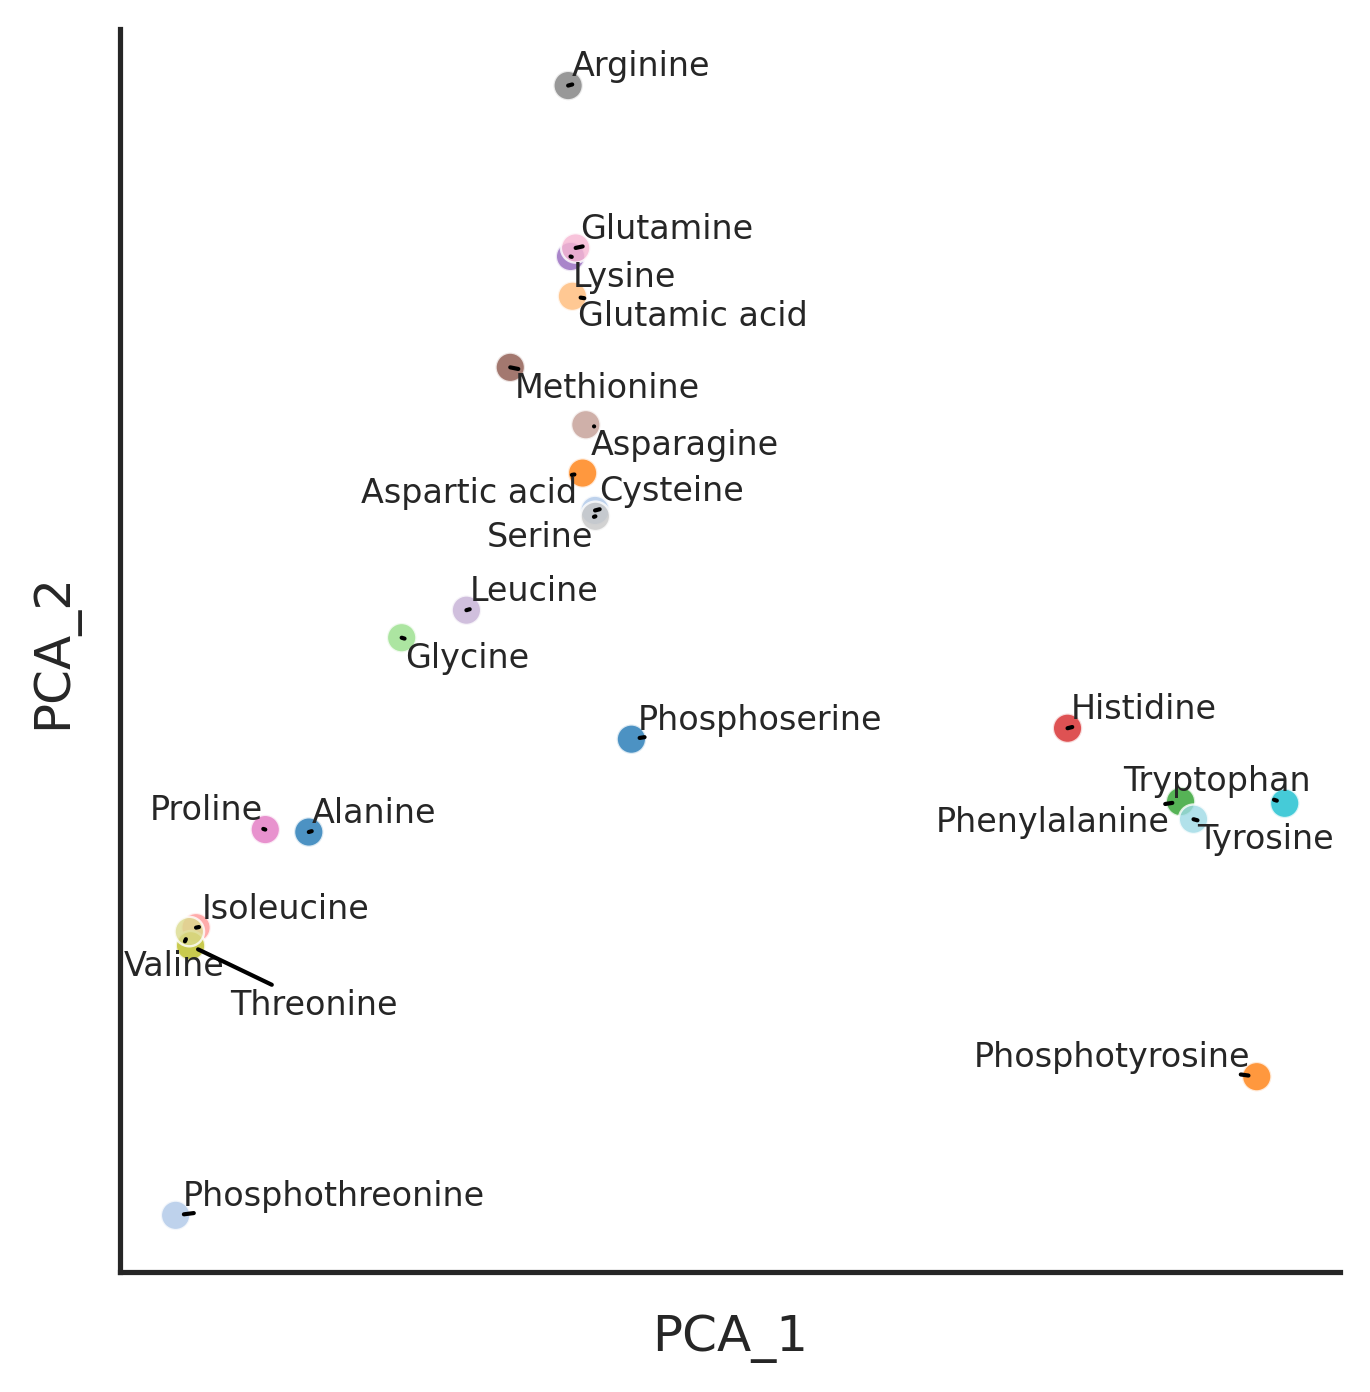

In [ ]:
plot_cluster(aa_morgan, name_list = aa.Name, hue = 'aa', method = 'pca')

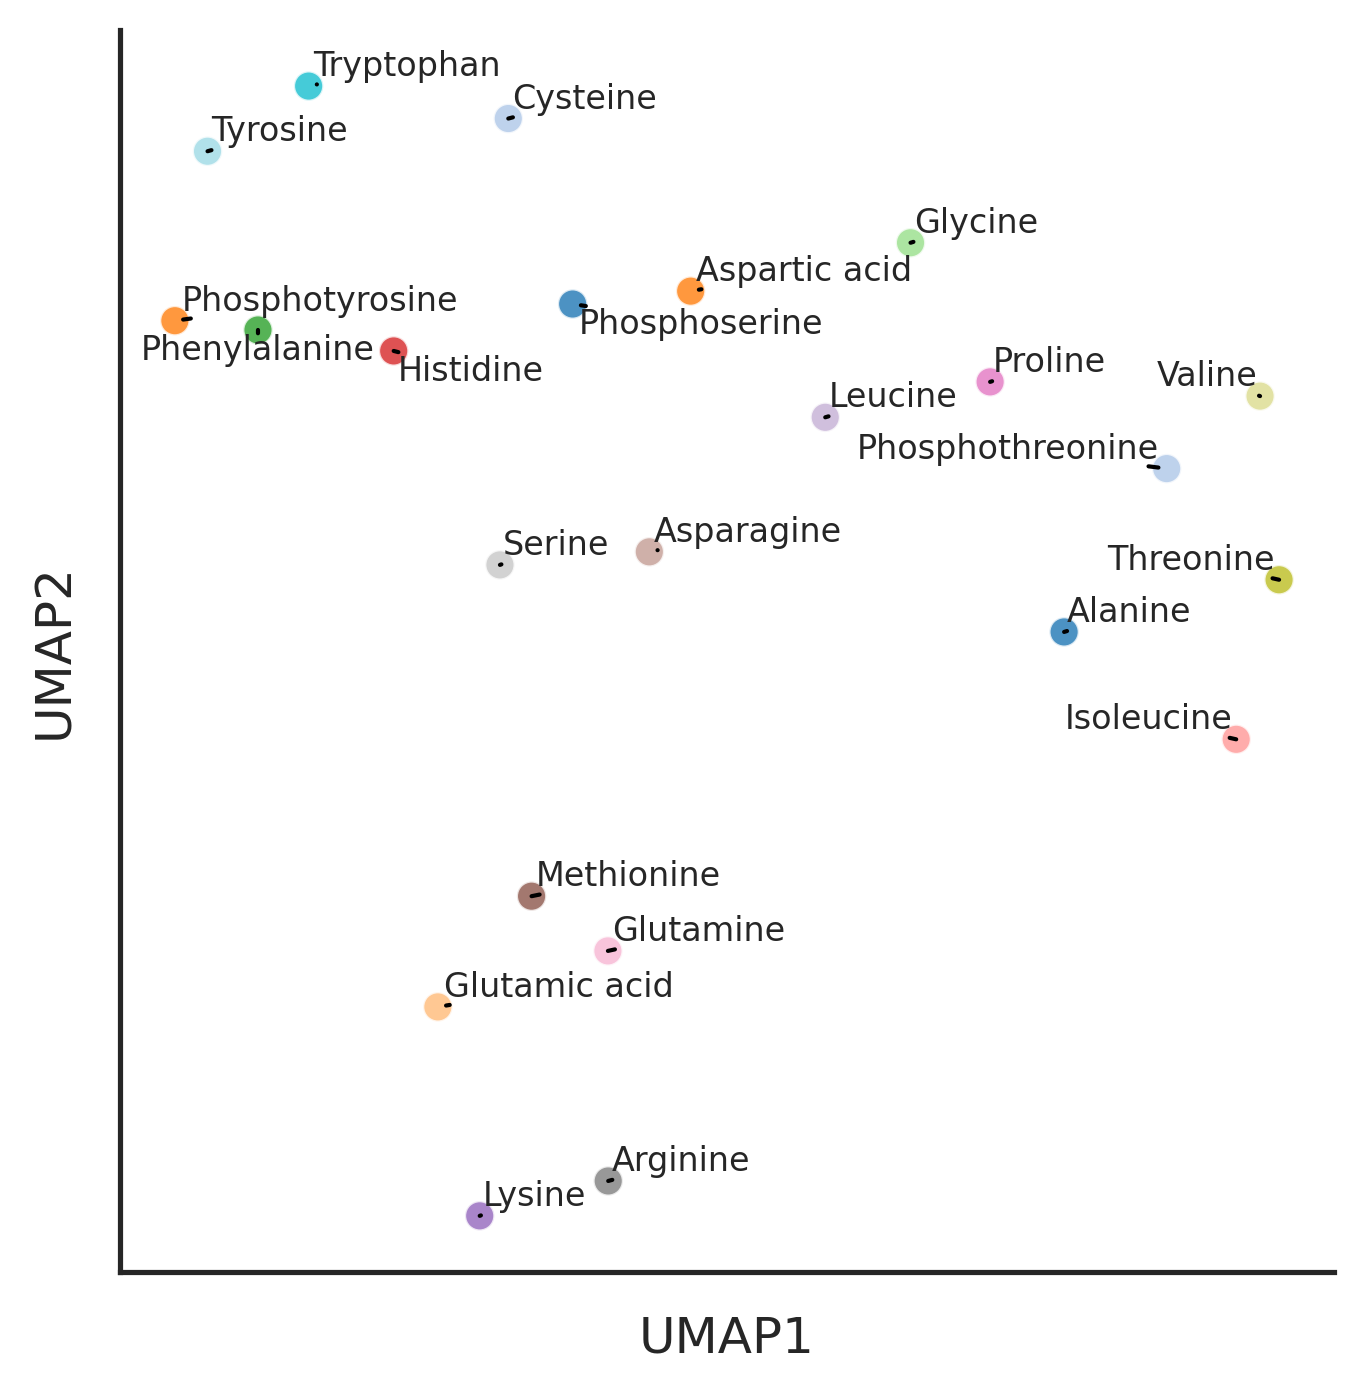

In [ ]:
plot_cluster(aa_morgan, name_list = aa.Name, hue = 'aa', method = 'umap',complexity=5)